In [78]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
selected_stocks = {'FOXA': None, 'GOOGL': None, 'AMZN': None, 'NVDA': None}

In [81]:
folder_stocks = "data/individual_stocks_5yr/individual_stocks_5yr"

combined_df = pd.DataFrame()

for stock_name in selected_stocks.keys():
    selected_stocks[stock_name] = pd.read_csv(f"{folder_stocks}/{stock_name}_data.csv")
        

In [82]:
for stock_name, stock_df in selected_stocks.items():
    print(f"\n\n Stock {stock_name}")
    print(stock_df.head())
    print(stock_df.info())



 Stock FOXA
         date   open   high    low  close    volume  Name
0  2013-06-19  28.15  28.76  27.95  28.35  10861005  FOXA
1  2013-06-20  29.90  29.90  27.30  27.50   8726576  FOXA
2  2013-06-21  28.00  28.00  27.22  27.59   2741716  FOXA
3  2013-06-24  27.49  28.46  26.99  27.30   3460937  FOXA
4  2013-06-25  27.99  27.99  27.43  27.53   3287184  FOXA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1169 non-null   object 
 1   open    1169 non-null   float64
 2   high    1169 non-null   float64
 3   low     1169 non-null   float64
 4   close   1169 non-null   float64
 5   volume  1169 non-null   int64  
 6   Name    1169 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 64.1+ KB
None


 Stock GOOGL
         date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  3

In [83]:
selected_stocks["AMZN"]

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN
...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN


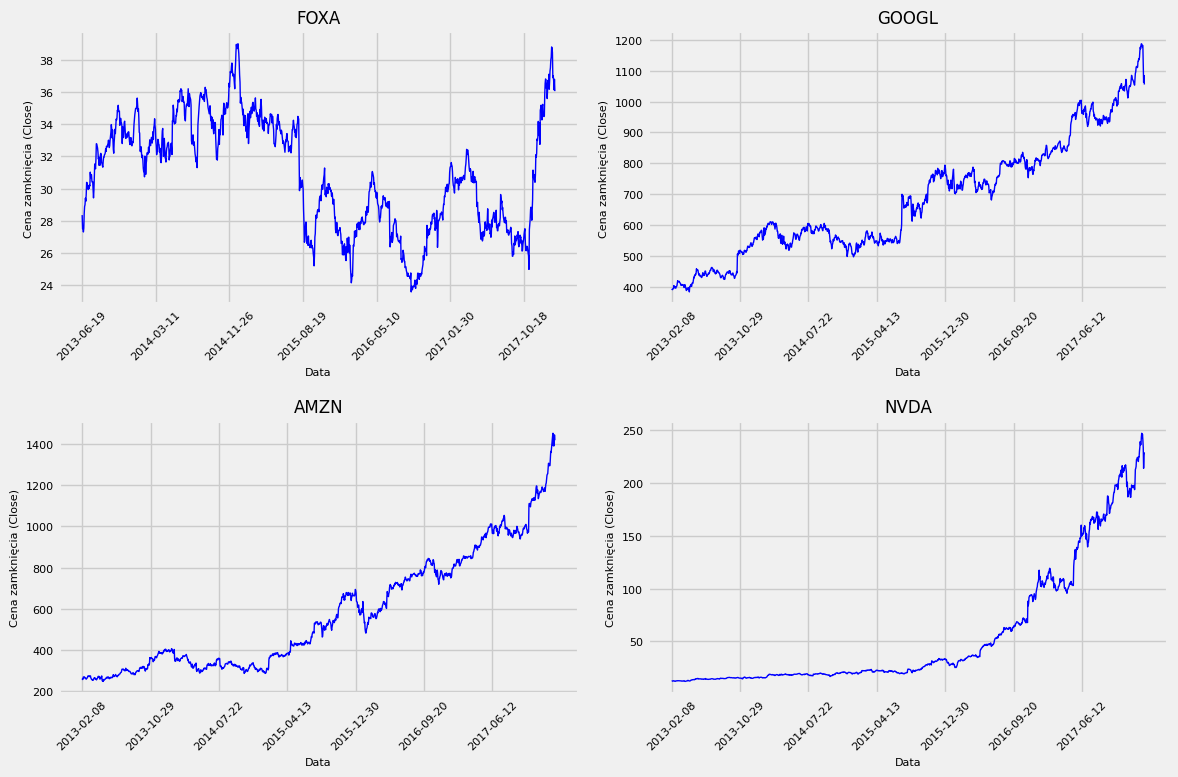

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid dla 4 wykresów
axes = axes.flatten()  # Spłaszczanie, aby łatwiej iterować przez osie

# Rysowanie wykresów
for ax, (stock_name, stock_df) in zip(axes, selected_stocks.items()):
    ax.plot(stock_df["date"], stock_df["close"], label='Cena zamknięcia (Close)', linewidth=1, color='blue')
    ax.set_title(f'{stock_name}', fontsize=12)

    ax.set_ylabel('Cena zamknięcia (Close)', fontsize=8)
    ax.set_xlabel('Data', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Ograniczenie liczby etykiet na osi X
    ax.set_xticks(stock_df['date'][::182])  # Wyświetlanie co ~6 miesięcy

# Dostosowanie układu
plt.tight_layout()
plt.show()

### Analiza SMA / EMA

### Różnice:
| **Kryterium**        | **SMA**                           | **EMA**                           |
|-----------------------|------------------------------------|------------------------------------|
| **Waga danych**       | Równa dla wszystkich punktów       | Większa dla nowszych danych        |
| **Reakcja na zmiany** | Wolniejsza                        | Szybsza                           |
| **Gładkość**          | Bardziej wygładzona               | Bardziej zmienna                  |

### Kluczowe zastosowania:
- **SMA**: Identyfikacja długoterminowych trendów, redukcja szumów.
- **EMA**: Szybka reakcja na krótkoterminowe zmiany.

### Strategie:
- **Golden Cross**: 50 EMA przecina 200 SMA **od dołu** (**sygnał kupna**).
- **Death Cross**: 50 EMA przecina 200 SMA **od góry** (**sygnał sprzedaży**).
- **Wsparcie/Opór**: SMA/EMA jako dynamiczne poziomy wsparcia/oporu.

In [85]:
def compute_sma(df, column, cycles):
    if column not in df.columns:
        raise ValueError(f"Kolumna '{column}' nie istnieje w DataFrame.")
    
    sma = df[column].rolling(window=cycles).mean()
    return sma

def compute_ema(df, column, cycles):
    if column not in df.columns:
        raise ValueError(f"Kolumna '{column}' nie istnieje w DataFrame.")
    
    ema = df[column].ewm(span=cycles, adjust=False).mean()
    return ema

for stock_name, stock_df in selected_stocks.items():
    stock_df['SMA_200'] = compute_sma(stock_df, 'close', 200)
    stock_df['EMA_50'] = compute_ema(stock_df, 'close', 50)

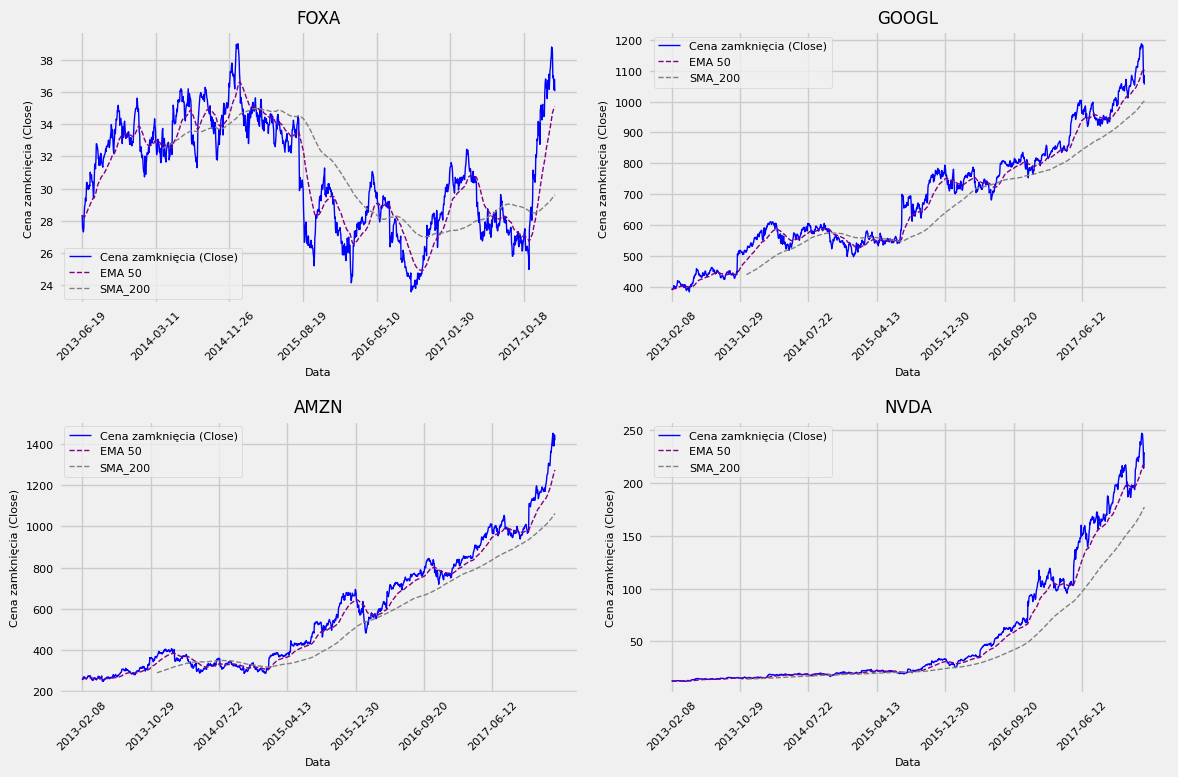

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid dla 4 wykresów
axes = axes.flatten()  # Spłaszczanie, aby łatwiej iterować przez osie

# Rysowanie wykresów
for ax, (stock_name, stock_df) in zip(axes, selected_stocks.items()):
    # Close Plot
    ax.plot(stock_df["date"], stock_df["close"], label='Cena zamknięcia (Close)', linewidth=1, color='blue')
    # EMA50 Plot
    ax.plot(stock_df["date"], stock_df["EMA_50"], label='EMA 50', linewidth=1, linestyle='--', color='purple')
    # SMA200 Plot
    ax.plot(stock_df["date"], stock_df["SMA_200"], label='SMA_200', linewidth=1, linestyle='--', color='gray')

    ax.set_title(f'{stock_name}', fontsize=12)

    ax.set_ylabel('Cena zamknięcia (Close)', fontsize=8)
    ax.set_xlabel('Data', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Ograniczenie liczby etykiet na osi X
    ax.set_xticks(stock_df['date'][::182])  # Wyświetlanie co ~6 miesięcy

    ax.legend(fontsize=8)

# Dostosowanie układu
plt.tight_layout()
plt.show()

# Daily change

* Duże dzienne zmiany sugerują, że akcja jest bardziej ryzykowna i podatna na spekulacje.
* Ocena ryzyka inwestycji
* Obliczanie stopy zwrotu

In [87]:
for stock_name, stock_df in selected_stocks.items():
    stock_df['daily_change'] = stock_df['close'].pct_change()

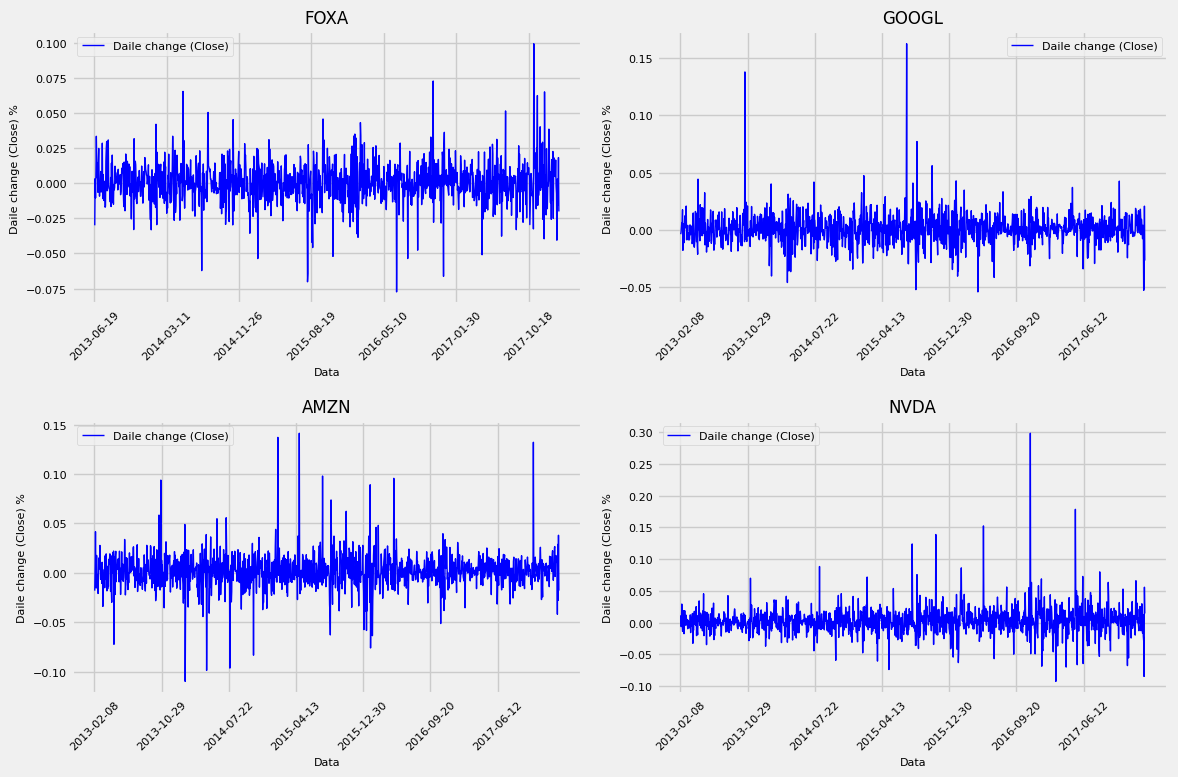

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid dla 4 wykresów
axes = axes.flatten()  # Spłaszczanie, aby łatwiej iterować przez osie

# Rysowanie wykresów
for ax, (stock_name, stock_df) in zip(axes, selected_stocks.items()):
    # Daily_change Plot
    ax.plot(stock_df["date"], stock_df["daily_change"], label='Daile change (Close)', linewidth=1, color='blue')
    ax.set_title(f'{stock_name}', fontsize=12)

    ax.set_ylabel('Daile change (Close) %', fontsize=8)
    ax.set_xlabel('Data', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Ograniczenie liczby etykiet na osi X
    ax.set_xticks(stock_df['date'][::182])  # Wyświetlanie co ~6 miesięcy

    ax.legend(fontsize=8)

# Dostosowanie układu
plt.tight_layout()
plt.show()

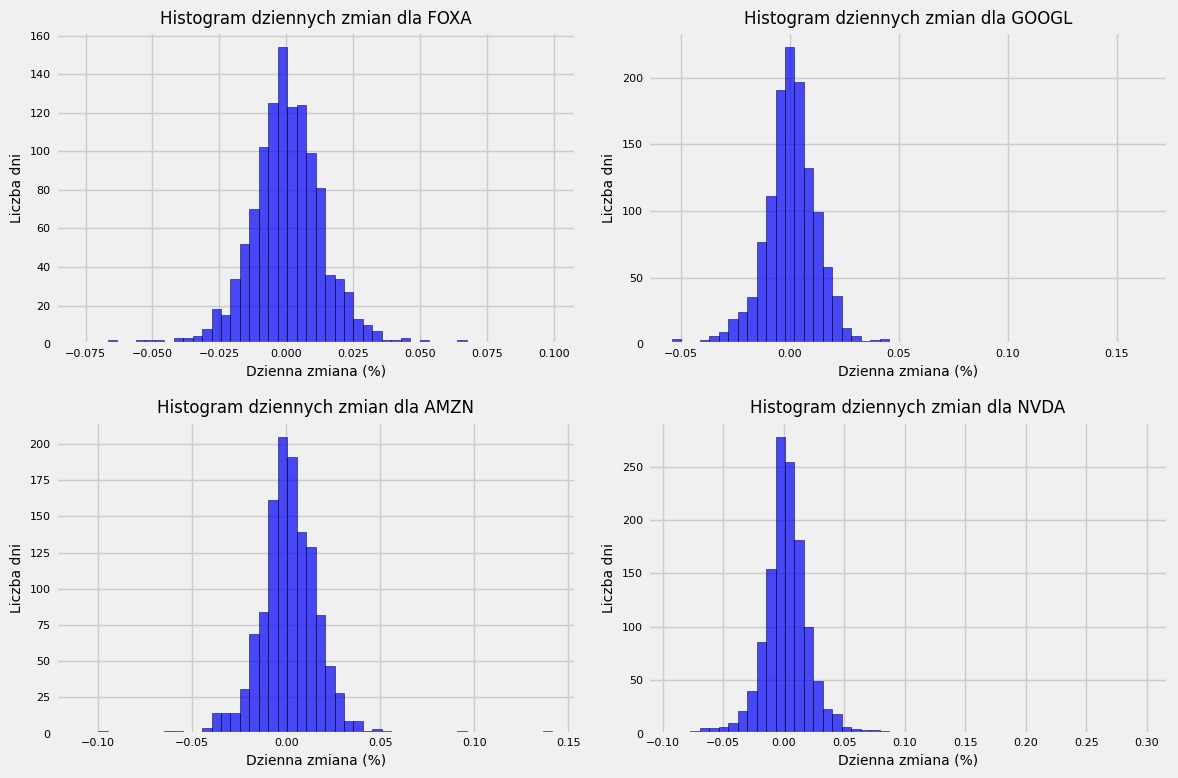

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid dla 4 histogramów
axes = axes.flatten()  # Spłaszczanie, aby łatwiej iterować przez osie

# Rysowanie histogramów
for ax, (stock_name, stock_df) in zip(axes, selected_stocks.items()):
    ax.hist(stock_df['daily_change'].dropna(), bins=50, color='blue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram dziennych zmian dla {stock_name}', fontsize=12)
    ax.set_xlabel('Dzienna zmiana (%)', fontsize=10)
    ax.set_ylabel('Liczba dni', fontsize=10)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=8)

# Dostosowanie układu
plt.tight_layout()
plt.show()

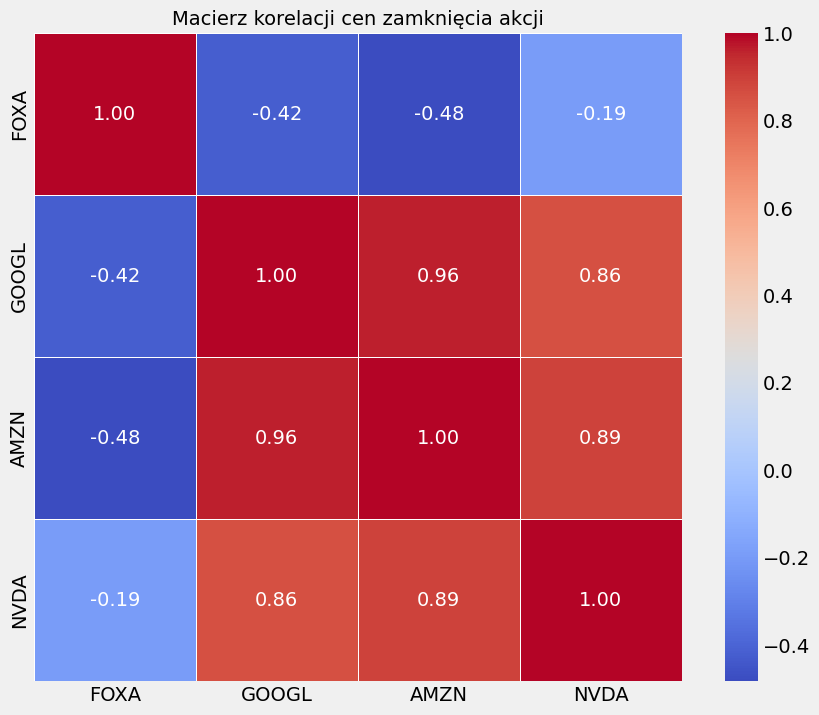

In [90]:
for stock_name, stock_df in selected_stocks.items():
    combined_df[stock_name] = stock_df['close']

correlation_matrix = combined_df.corr()

# Ustawienia wykresu
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)

# Tytuł wykresu
plt.title('Macierz korelacji cen zamknięcia akcji', fontsize=14)
plt.show()


In [95]:
# Dodawanie kolumny 'date_y_m' w formacie 'rok-miesiąc'
for stock_name, stock_df in selected_stocks.items():
    stock_df['date'] = pd.to_datetime(stock_df['date'])
    stock_df['date_y_m'] = stock_df['date'].dt.to_period('M')

In [97]:
monthly_risk_metrics = {}

for stock_name, stock_df in selected_stocks.items():
    # Grupa danych według miesięcy i obliczenie średniej oraz odchylenia standardowego
    monthly_returns = stock_df.groupby('date_y_m')['daily_change'].mean()
    monthly_std_dev = stock_df.groupby('date_y_m')['daily_change'].std()
    
    monthly_risk_metrics[stock_name] = {
        'Expected Monthly Return (%)': monthly_returns.mean(),
        'Monthly Standard Deviation (%)': monthly_std_dev.mean()
    }

monthly_risk_df = pd.DataFrame(monthly_risk_metrics).T
print(monthly_risk_df)

       Expected Monthly Return (%)  Monthly Standard Deviation (%)
FOXA                      0.000300                        0.014267
GOOGL                     0.000595                        0.012770
AMZN                      0.001432                        0.016949
NVDA                      0.002358                        0.020424


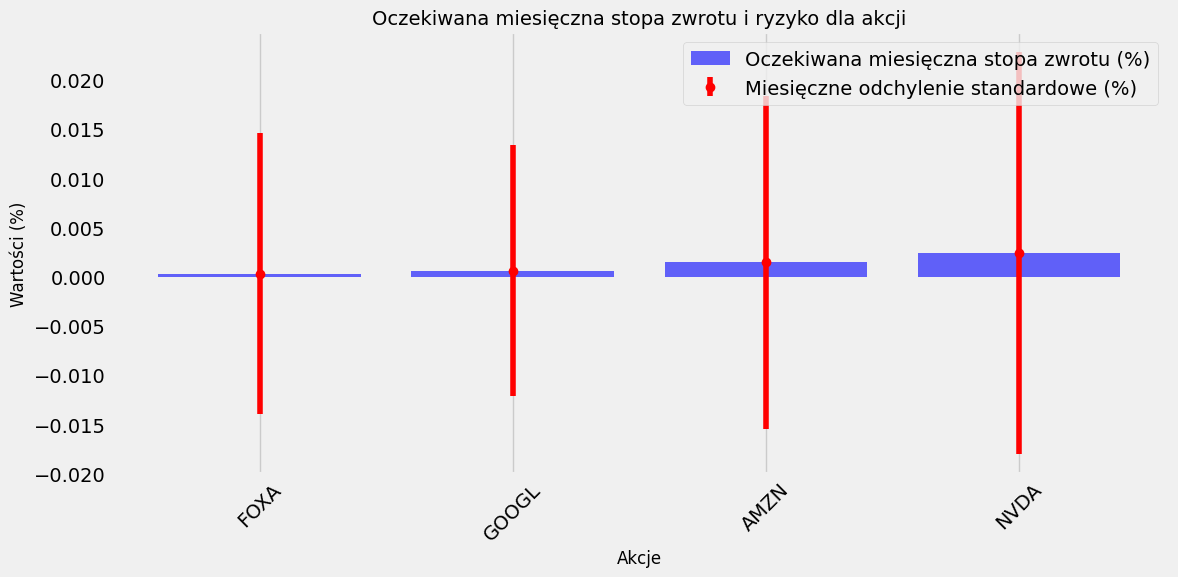

In [98]:
plt.figure(figsize=(12, 6))

# Wykres słupkowy dla oczekiwanej miesięcznej stopy zwrotu
plt.bar(monthly_risk_df.index, monthly_risk_df['Expected Monthly Return (%)'], 
        color='blue', alpha=0.6, label='Oczekiwana miesięczna stopa zwrotu (%)')

# Wykres słupkowy dla miesięcznego odchylenia standardowego
plt.errorbar(monthly_risk_df.index, monthly_risk_df['Expected Monthly Return (%)'], 
             yerr=monthly_risk_df['Monthly Standard Deviation (%)'], 
             fmt='o', color='red', label='Miesięczne odchylenie standardowe (%)')

# Ustawienia tytułu i etykiet
plt.title('Oczekiwana miesięczna stopa zwrotu i ryzyko dla akcji', fontsize=14)
plt.xlabel('Akcje', fontsize=12)
plt.ylabel('Wartości (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

# Prediction

In [ ]:
selected_stocks['AMZN'].sort_values(by='date')["close"]

,date,open,high,low,close,volume,Name,SMA_200,EMA_50,daily_change,date_y_m
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,NaN,261.950000,NaN,2013-02
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,NaN,261.764118,-0.018095,2013-02
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,NaN,261.643956,0.005793,2013-02
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,NaN,261.950860,0.041631,2013-02
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,NaN,262.236708,-0.000854,2013-02
...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN,1051.55800,1247.792877,-0.041967,2018-02
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN,1054.21175,1254.936294,0.028741,2018-02
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN,1056.65145,1260.232910,-0.027938,2018-02
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN,1059.37300,1267.393972,0.038014,2018-02


In [160]:
dataset = selected_stocks['AMZN'].sort_values(by='date')["close"]

In [161]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1197

In [166]:
print(f"Rozmiar zbióru trenignowego: {training_data_len}")
print(f"Rozmiar zbióru validacyjnego: {len(dataset) - training_data_len}")

Rozmiar zbióru trenignowego: 1197
Rozmiar zbióru validacyjnego: 62


In [ ]:
sequence_length = 60

print(f"Index zbióru trenignowego: {training_data_len}")
print(f"Index zbióru validacyjnego: {training_data_len - sequence_length}")

Index zbióru trenignowego: 1197
Index zbióru validacyjnego: 1137


In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset.to_numpy().reshape(-1, 1))

In [196]:
len(scaled_data[training_data_len-sequence_length:])

122

In [180]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

train_X, train_y = create_sequences(scaled_data[:training_data_len], sequence_length)
val_X, val_y = create_sequences(scaled_data[training_data_len-sequence_length:], sequence_length)

# Norm

In [205]:
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset
import numpy as np
import torch


class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(train_X, train_y)
val_dataset = StockDataset(val_X, val_y)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [206]:
first_batch = next(iter(train_loader))
first_batch_size = first_batch[0].size()  # Rozmiar wejścia
first_batch_labels_size = first_batch[1].size()  # Rozmiar etykiety

print(f"Rozmiar wejscia: {first_batch_size}, etykiety: {first_batch_labels_size}")

Rozmiar wejscia: torch.Size([16, 60, 1]), etykiety: torch.Size([16, 1])


# LSTM

In [210]:
from torch import nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, 128, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(128, 64, num_layers, batch_first=True)
        self.fc1 = nn.Linear(64, 25)
        self.fc2 = nn.Linear(25, 1)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out = self.fc1(out[:, -1, :])  # Weź ostatnią wartość
        out = self.fc2(out)
        return out
    
model = LSTMModel(input_size=1, num_layers=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [215]:
from tqdm import tqdm

num_epochs = 100

for epoch in tqdm(range(num_epochs)):

    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        inputs = inputs.float()
        labels = labels.float() 

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()  # Ustawienie modelu w tryb ewaluacji
    val_loss = 0.0
    with torch.no_grad():  # Wyłączanie gradientów dla ewaluacji
        for val_inputs, val_labels in val_loader:
            val_inputs = val_inputs.float()
            val_labels = val_labels.float()

            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()  # Dodaj stratę do zbioru walidacyjnego

    # Uśrednienie straty walidacyjnej
    val_loss /= len(val_loader)

    # Wyświetlenie wyników co 10 epok
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}')

 10%|█         | 10/100 [00:13<01:47,  1.20s/it]

Epoch [10/100], Loss: 0.0000, Validation Loss: 0.0008


 20%|██        | 20/100 [00:24<01:30,  1.13s/it]

Epoch [20/100], Loss: 0.0000, Validation Loss: 0.0004


 30%|███       | 30/100 [00:36<01:27,  1.25s/it]

Epoch [30/100], Loss: 0.0000, Validation Loss: 0.0008


 40%|████      | 40/100 [00:49<01:15,  1.26s/it]

Epoch [40/100], Loss: 0.0000, Validation Loss: 0.0003


 40%|████      | 40/100 [00:50<01:15,  1.26s/it]


KeyboardInterrupt: 